### Notebook to genereate plots of isentropic binned variables.

James Ruppert  
jruppert@ou.edu  
5/10/24

In [1]:
import numpy as np
from matplotlib import rc, colors, ticker
import matplotlib.pyplot as plt
from thermo_functions import *
from read_wrf_piccolo import *
from write_isentrop_functions import *
import pickle
import seaborn as sns

### Main settings

In [7]:
case = "sept1-4"
itest_plot = [0,1] # 0,1
# itest_plot = [0] # 0,1

# Time averaging for plots
t0_plot = 0
t1_plot = 12*3 # n time steps to sample for tests
# t1_plot = 24*3 # n time steps to sample for tests

In [8]:
# Scratch
# datdir = "/glade/derecho/scratch/ruppert/piccolo/"
# Campaign storage
datdir = "/glade/campaign/univ/uokl0053/"
# OSCER
# datdir = "/ourdisk/hpc/radclouds/auto_archive_notyet/tape_2copies/piccolo/"

tests = ['ctl','ncrf12h']
tests_str = ['CTL','NCRF']

wrf_dom = "wrf_fine"
nmem = 5 # number of ensemble members

# Get list of variable names and pclasses
var_list, pclass_names = get_variable_list()
pclass_title = ["Non-cloud", "Deep", "Cong", "Shallow", "Strat", "Anvil", "All"]
npclass = len(pclass_title)
ipclass_plot  = [0,1,2,3,4,5]
# ipclass_plot  = [1,2,3,4,5,6]
npclass = len(ipclass_plot)

# Time bounds of processed 3D variables
t0_3d = np.datetime64('2024-09-02T00:00:00')
t1_3d = np.datetime64('2024-09-03T00:00:00')

# Get date tag for post_proc output files
def get_datetag(datetime):
    string = np.datetime_as_string(datetime, unit='m').replace("-","").replace(" ","").replace(":","")
    return string
t0_str = get_datetag(t0_3d)
t1_str = get_datetag(t1_3d)
tag_postproc = '_'+t0_str+'-'+t1_str

# Ens-member string tags (e.g., memb_01, memb_02, etc.)
memb0=1 # Starting member to read
memb_nums_str=np.arange(memb0,nmem+memb0,1).astype(str)
nustr = np.char.zfill(memb_nums_str, 2)
memb_all=np.char.add('memb_',nustr)

print(var_list)
print()
print(pclass_title)
print()
print("Binned variable dimensions:")
print("  (nmem, ntime, nz, nbin)")
print("Mean variable dimensions:")
print("  (nmem, ntime, nz)")

['rho']

['Non-cloud', 'Deep', 'Cong', 'Shallow', 'Strat', 'Anvil', 'All']

Binned variable dimensions:
  (nmem, ntime, nz, nbin)
Mean variable dimensions:
  (nmem, ntime, nz)


### Read functions

In [9]:
# Format of return:
#   File "mainvars_*":
#     return =  bins
#               pres
#               theta_e_mean
#               pclass_count
#               freq_binned

#   File "varname_*":
#     return =  invar_binned
#               invar_mean

def read_isentrop_mainvars(test_string, pclass_tag):

    theta_e_mean_all = []
    pclass_count_all = []
    freq_all = []

    for memb_dir in memb_all:
        outdir, postproc_files, nt, nx, ny = get_postproc_dims(datdir, case, test_string, wrf_dom, memb_dir)
        # Read from pickle files
        pickle_file = outdir+'isentrop/mainvars_'+pclass_tag+'_'+tag_postproc+'.pkl'
        with open(pickle_file, 'rb') as file:
            main_dict = pickle.load(file)
        theta_e_mean_all.append(main_dict['theta_e_mean'])
        pclass_count_all.append(main_dict['pclass_count'])
        freq_all.append(main_dict['freq_binned'])

    # Convert to numpy and subset to desired time
    theta_e_mean_all = np.array(theta_e_mean_all)[:,t0_plot:t1_plot,...]
    pclass_count_all = np.array(pclass_count_all)[:,t0_plot:t1_plot]
    freq_all = np.array(freq_all)[:,t0_plot:t1_plot,...]

    return main_dict['bins'], main_dict['pres'], theta_e_mean_all, pclass_count_all, freq_all

def read_isentrop_allvars(test_string, var_tag, pclass_tag):

    invar_binned_all = []
    invar_mean_all = []

    for memb_dir in memb_all:
        outdir, postproc_files, nt, nx, ny = get_postproc_dims(datdir, case, test_string, wrf_dom, memb_dir)
        # Read from pickle files
        pickle_file = outdir+'isentrop/'+var_tag+'_'+pclass_tag+'_'+tag_postproc+'.pkl'
        with open(pickle_file, 'rb') as file:
            main_dict = pickle.load(file)
        invar_binned_all.append(main_dict['invar_binned'])
        invar_mean_all.append(main_dict['invar_mean'])

    # Convert to numpy and subset to desired time
    invar_binned_all = np.array(invar_binned_all)[:,t0_plot:t1_plot,...]
    invar_mean_all = np.array(invar_mean_all)[:,t0_plot:t1_plot,...]

    return invar_binned_all, invar_mean_all

In [10]:
outdir, postproc_files, nt, nx, ny = get_postproc_dims(datdir, case, 'ctl', wrf_dom, 'memb_01')
pickle_file = outdir+'isentrop/rho_noncloud_'+tag_postproc+'.pkl'
with open(pickle_file, 'rb') as file:
    main_dict = pickle.load(file)
# invar_binned_all.append(main_dict['invar_binned'])
# invar_mean_all.append(main_dict['invar_mean'])
main_dict.keys()
main_dict['invar_binned'].shape
main_dict['invar_binned'][5,:,45]
main_dict['invar_mean'][5,:]

masked_array(data=[1.156157458918888, 1.135317643946812,
                   1.1132811282969814, 1.089610172244078,
                   1.0647751240509753, 1.0382993048255236,
                   1.0115298385038825, 0.9855218653809954,
                   0.9600217164225598, 0.9346690703747399,
                   0.9092935559941728, 0.8838745425117744,
                   0.8583846937463464, 0.8327906218393379,
                   0.8070516482831848, 0.7811639620568114,
                   0.7551080938134204, 0.7288153623253724,
                   0.7022183290892919, 0.6753577554610275,
                   0.648379910086414, 0.6213374430500894,
                   0.5943038822043211, 0.5672796832146725,
                   0.5402235462114474, 0.513174078495104,
                   0.4861070055183585, 0.4588863732467646,
                   0.4313842225053056, 0.4035523355925508,
                   0.37536921337873863, 0.3466854182711618,
                   0.3170605080787019, 0.2855873562250875,
 

### Plot functions

In [11]:
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 12}

rc('font', **font)

#### Main plot code

In [12]:
def plot_pclass_multipan(bins, pres, invar, th_mean, title_tag, units, pclass_title,
                    cmap='RdGy_r', norm=None, th_mean0=None, do_thm0_pclass=False, invar_mean=None):

# Now plotting mean panels side-by-side

        if invar_mean is None:
                do_means=False
                npanel=1
        else:
                do_means=True
                npanel=2

        if do_means:
                fig, axs = plt.subplots(2,6, figsize=(14,9), layout="constrained", # row, column
                        width_ratios=[5,2,5,2,5,2])
                axs[1,2].set_xlabel(r'$\theta_e$ [K]')
                axs[0,5].set_title('Mean')
                axs[1,5].set_xlabel(units)
        else:
                fig, axs = plt.subplots(2,3, figsize=(14,9)) # row, column
                axs[1,1].set_xlabel(r'$\theta_e$ [K]')

        fig_title = title_tag
        fig.suptitle(fig_title)
        for irow in range(2):
                axs[irow,0].set_ylabel('Pressure [hPa]')

        for ipclass in range(npclass):
                # if ipclass == 1:
                #         continue
                icol=ipclass
                if icol < 3:
                        irow=0
                else:
                        irow=1
                        icol-=3
                if do_means:
                        icol*=2
                subtitle = pclass_title[ipclass_plot[ipclass]]
                axs[irow,icol].set_title(subtitle)
                for ipan in range(npanel):
                        icol+=ipan
                        axs[irow,icol].set_yscale('log')
                        nz=pres.size
                        dp = pres[0]-pres[1]
                        p2 = np.append(np.array(pres+dp/2), pres[nz-1]-dp/2)
                        axs[irow,icol].set_ylim(1000, 100)
                        axs[irow,icol].yaxis.set_major_formatter(ticker.ScalarFormatter())
                        axs[irow,icol].yaxis.set_minor_formatter(ticker.ScalarFormatter())
                        # Fill plot
                        if ipan == 0:
                                axs[irow,icol].grid(True, axis='x', color='0.55', linewidth=0.5)
                                # axs[irow,icol].grid(True, axis='y', color='0.55', linewidth=0.5, which='both')
                                pltvar = invar[ipclass]
                                im = axs[irow,icol].pcolormesh(bins, p2, pltvar, cmap=cmap, norm=norm)
                                axs[irow,icol].set_xlim(305, 365)
                                # Mean profiles
                                linecol='g'
                                axs[irow,icol].plot(th_mean[ipclass], pres, "-"+linecol)
                                # if do_thm0_pclass:
                                #         axs[irow,icol].plot(th_mean0[ipclass], pres, "--"+linecol)
                                # else:
                                #         axs[irow,icol].plot(th_mean[0], pres, "--"+linecol)
                        else:
                                axs[irow,icol].plot(invar_mean[ipclass], pres, '-k', linewidth=1)
                                axs[irow,icol].axvline(color='black', linewidth=0.5)
                                # axs[irow,icol].set_xlim(-0.3, .7)
                        axs[irow,icol].grid(True, axis='y', color='0.55', linewidth=0.5, which='both')
                        # Remove labels for inner panels
                        if icol > 0:
                                yticks = np.arange(1000,0,-100)
                                axs[irow,icol].yaxis.set_ticks(yticks, labels=np.repeat('',yticks.size))
                        # if irow == 0 and ipan == 0:
                        #         xticks = axs[irow,icol].get_xticks()
                        #         axs[irow,icol].xaxis.set_ticks(xticks, labels=np.repeat('',xticks.size))

        # fig.subplots_adjust(right=0.8)
        # cbar_ax = fig.add_axes([0.83, 0.25, 0.02, 0.5]) # L, B, Width, Height
        # fig.colorbar(im, cax=cbar_ax, label=units)
        fig.colorbar(im, ax=axs, label=units, shrink=0.6)

        # plt.tight_layout()
        plt.show()
        plt.close()

In [13]:
# Individual panels
def plot_binned_var(bins, pres, binvar, th_mean, title_tag, units, pclass_title,
                    cmap='RdGy_r', norm=None):
        # for ipclass in range(npclass):
                fig_title = title_tag+' '+pclass_title+')'#; '+test_str.upper()+')'
                # create figure
                fig = plt.figure()#figsize=(14,4))
                ax = fig.add_subplot(111)
                ax.set_title(fig_title)
                ax.set_xlabel(r'$\theta_e$ [K]')
                ax.set_ylabel('Pressure [hPa]')
                ax.set_yscale('log')
                nz=pres.size
                dp = pres[0]-pres[1]
                p2 = np.append(np.array(pres+dp/2), pres[nz-1]-dp/2)
                ibinvar = binvar#[ipclass]
                im = ax.pcolormesh(bins, p2, ibinvar, cmap=cmap, norm=norm)
                # Mean profile
                plt.plot(th_mean, pres, "-k")
                # plt.plot(th_mean[0], pres, "--k")
                plt.xlim(300, 370)
                plt.ylim(1000, 100)
                ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
                ax.yaxis.set_minor_formatter(ticker.ScalarFormatter())
                cbar = plt.colorbar(im, ax=ax, shrink=0.75)
                cbar.ax.set_ylabel(units)
                # plt.savefig(figdir+'pclass_frac_'+binvartag+'_'+test_str+'.png',dpi=200, facecolor='white', \
                #             bbox_inches='tight', pad_inches=0.2)
                plt.show()
                plt.close()

In [14]:
itest=0
# for ipclass in range(npclass):
for ipclass in [0]:

    pclass_read = pclass_names[ipclass_plot[ipclass]]
    bins, pres, theta_e_mean, pclass_count, freq = read_isentrop_mainvars(tests[itest_plot[itest]], pclass_read)
    rho, rho_mean = read_isentrop_allvars(tests[itest_plot[itest]], 'rho', pclass_read)
    w, w_mean = read_isentrop_allvars(tests[itest_plot[itest]], 'w', pclass_read)

    vmf = w*rho # kg/m2/s
    vmf_mean = np.nanmean(vmf,axis=(0,1)) # average over (ens member, time)

    invar_allmean = np.nanmean(w_mean*rho_mean,axis=(0,1)) # kg/m2/s
    th_mean = np.nanmean(theta_e_mean,axis=(0,1))

    title_tag = 'VMF ('+tests_str[itest].upper()+'; '
    units = 'kg/m$^2$/s'
    cmap = 'RdGy_r'
    normmin=-1e3; normmax=1e3
    norm = colors.SymLogNorm(linthresh=1e-2, linscale=1, vmin=normmin, vmax=normmax)
    # plot_pclass_multipan(bins, pres, vmf_mean, th_mean, title_tag, units, pclass_title,
    #                     cmap=cmap, norm=norm, invar_mean=invar_allmean)
    # plot_binned_var(bins, pres, vmf_mean, th_mean, title_tag, units, pclass_title[ipclass_plot[ipclass]],
    #                 cmap=cmap, norm=norm)

/glade/derecho/scratch/ruppert/tmp/ipykernel_28879/308653397.py:11: RuntimeWarning: Mean of empty slice
  vmf_mean = np.nanmean(vmf,axis=(0,1)) # average over (ens member, time)


#### CTL plots

In [18]:
def run_ctl_plots(do_freq=False, do_freqnorm=False, do_relhum=False, do_vmf=False, do_lwcrf=False,
                  do_swcrf=False, do_swrad=False, do_totrad=False, do_thv=False, do_thvprm=False,
                  do_umf=False, do_dmf=False):

    # Function to read variables across all p-classes
    def get_var_allpclass(ktest, var_tag):
        var_pclass = np.zeros((npclass, pres.size, bins.size-1))
        var_mean_pclass = np.zeros((npclass, pres.size))
        for ipclass in range(npclass):
            var, var_mean = read_isentrop_allvars(tests[itest_plot[ktest]], var_tag, pclass_names[ipclass_plot[ipclass]])
            var_pclass[ipclass] = np.ma.mean(var,axis=(0,1))
            var_mean_pclass[ipclass] = np.ma.mean(var_mean,axis=(0,1))
        return var_pclass, var_mean_pclass

    # Get bins, pres
    bins, pres, theta_e_mean, pclass_count, freq = read_isentrop_mainvars(tests[itest_plot[0]], pclass_names[ipclass_plot[0]])

    # ktest=0
    for ktest in range(1,2):

        # frequency = np.mean(freq,axis=(0,1))
        th_mean = np.zeros((npclass, pres.size))
        for ipclass in range(npclass):
            bins, pres, theta_e_mean, pclass_count, freq = read_isentrop_mainvars(tests[itest_plot[ktest]], pclass_names[ipclass_plot[ipclass]])
            th_mean[ipclass] = np.ma.mean(theta_e_mean,axis=(0,1))

        if do_freq:

            title_tag = 'Frequency ('+tests_str[ktest].upper()+')  '
            units = ' '
            cmap = 'twilight'
            normmin=1
            normmax=1e5
            norm=colors.LogNorm(vmin=normmin, vmax=normmax)

            freq_allclass = np.zeros((npclass, pres.size, bins.size-1))
            for ipclass in range(npclass):
                bins, pres, theta_e_mean, pclass_count, freq = read_isentrop_mainvars(tests[itest_plot[ktest]], pclass_names[ipclass_plot[ipclass]])
                freq_allclass[ipclass] = np.ma.mean(freq,axis=(0,1))

            plot_pclass_multipan(bins, pres, freq_allclass, th_mean, title_tag, units, pclass_title,
                                cmap=cmap, norm=norm)

        if do_freqnorm:

            title_tag = "Normalized Frequency Difference from 'All' ("+tests_str[ktest].upper()+")  "
            units = '%'
            cmap = 'RdGy_r'
            # norm=colors.SymLogNorm(linthresh=0.01, linscale=1, vmin=-1e-1, vmax=1e-1)
            norm=colors.SymLogNorm(linthresh=0.1, linscale=1, vmin=-1e0, vmax=1e0)

            freq_norm = np.zeros((npclass, pres.size, bins.size-1))
            # Get frequency for pclass = 'All' to use for normalization
            bins, pres, theta_e_mean, pclass_count, freq_pclassall = read_isentrop_mainvars(tests[itest_plot[ktest]], pclass_names[6])
            ifreq1 = np.ma.mean(freq_pclassall, axis=(0,1))
            total1 = np.nansum(ifreq1)
            for ipclass in range(npclass):
                bins, pres, theta_e_mean, pclass_count, freq = read_isentrop_mainvars(tests[itest_plot[ktest]], pclass_names[ipclass_plot[ipclass]])
                ifreq2 = np.ma.mean(freq, axis=(0,1))
                total2 = np.nansum(ifreq2)
                freq_norm[ipclass] = 1e2*((ifreq2/total2) - (ifreq1/total1))# / (ifreq1/total1)

            plot_pclass_multipan(bins, pres, freq_norm, th_mean, title_tag, units, pclass_title,
                                cmap=cmap, norm=norm)

        if do_relhum:

            qv, qv_mean = get_var_allpclass(ktest, 'qvapor') # returns averages over (ens member, time)
            tmpk, tmpk_mean = get_var_allpclass(ktest, 'tmpk') # returns averages over (ens member, time)

            relh_binned = calc_relh(qv, pres[:,np.newaxis]*1e2, tmpk, ice=True)
            invar_mean = calc_relh(qv_mean, pres*1e2, tmpk_mean, ice=True)

            title_tag = 'Relative Humidity ('+tests_str[ktest].upper()+')  '
            units = '%'
            cmap = 'BrBG'
            norm=colors.Normalize(vmin=20, vmax=100)

            plot_pclass_multipan(bins, pres, relh_binned, th_mean, title_tag, units, pclass_title,
                                cmap=cmap, norm=norm, invar_mean=invar_mean)

        if do_vmf:

            w, w_mean     = get_var_allpclass(ktest, 'w') # returns averages over (ens member, time)
            rho, rho_mean = get_var_allpclass(ktest, 'rho') # returns averages over (ens member, time)

            vmf_binned = w*rho # kg/m2/s
            invar_mean = w_mean*rho_mean # kg/m2/s
            # vmf_binned = w # kg/m2/s
            # invar_mean = w_mean # kg/m2/s
            # vmf_binned = rho # kg/m2/s
            # invar_mean = rho_mean # kg/m2/s

            title_tag = 'VMF ('+tests_str[ktest].upper()+')  '
            units = 'kg/m$^2$/s'
            cmap = 'RdGy_r'
            normmin=-1e0; normmax=1e0
            norm = colors.SymLogNorm(linthresh=1e-2, linscale=1, vmin=normmin, vmax=normmax)
            plot_pclass_multipan(bins, pres, vmf_binned, th_mean, title_tag, units, pclass_title,
                                cmap=cmap, norm=norm, invar_mean=invar_mean)

        if do_umf:

            w = np.array(allvars['w'][ktest])
            rho = np.array(allvars['rho'][ktest])
            vmf = w*rho # kg/m2/s
            umf = np.ma.masked_where(vmf <= 0, vmf, copy=True)
            umf_mean = np.mean(umf,axis=(0,2))

            title_tag = 'UMF ('+tests_str[ktest].upper()+')  '
            units = 'kg/m$^2$/s'
            cmap = 'RdGy_r'
            normmin=-1e0; normmax=1e0
            norm = colors.SymLogNorm(linthresh=1e-2, linscale=1, vmin=normmin, vmax=normmax)
            plot_pclass_multipan(bins, pres, umf_mean, th_mean, title_tag, units, pclass_title,
                                cmap=cmap, norm=norm)#, invar_mean=invar_allmean)

        if do_dmf:

            w = np.array(allvars['w'][ktest])
            rho = np.array(allvars['rho'][ktest])
            vmf = w*rho # kg/m2/s
            dmf = np.ma.masked_where(vmf >= 0, vmf, copy=True)
            dmf_mean = np.mean(dmf,axis=(0,2))*-1 # Flip sign

            title_tag = 'DMF ('+tests_str[ktest].upper()+')  '
            units = 'kg/m$^2$/s'
            cmap = 'RdGy_r'
            normmin=-1e0; normmax=1e0
            norm = colors.SymLogNorm(linthresh=1e-2, linscale=1, vmin=normmin, vmax=normmax)
            plot_pclass_multipan(bins, pres, dmf_mean, th_mean, title_tag, units, pclass_title,
                                cmap=cmap, norm=norm)#, invar_mean=invar_allmean)

        if do_lwcrf:

            lw, lw_mean   = get_var_allpclass(ktest, 'rthratlw') # returns averages over (ens member, time)
            lwc, lwc_mean = get_var_allpclass(ktest, 'rthratlwc') # returns averages over (ens member, time)

            # lwcrf_binned = (lw - lwc)*3600*24 # K/s --> K/d
            lwcrf_binned = lw*3600*24 # K/s --> K/d

            # invar_mean = (lw_mean - lwc_mean)*3600*24 # K/s --> K/d
            invar_mean = (lw_mean)*3600*24 # K/s --> K/d

            title_tag = 'LW-CRF ('+tests_str[ktest].upper()+')  '
            units = 'K/d'
            cmap = 'RdBu_r'
            norm = colors.TwoSlopeNorm(vmin=-6, vcenter=0, vmax=8)
            plot_pclass_multipan(bins, pres, lwcrf_binned, th_mean, title_tag, units, pclass_title,
                                cmap=cmap, norm=norm, invar_mean=invar_mean)

        if do_swcrf:

            sw = np.array(allvars['sw'][ktest])
            swc = np.array(allvars['swc'][ktest])
            swcrf = (sw - swc)*3600*24 # K/s --> K/d
            swcrf_mean = np.mean(swcrf,axis=(0,2))

            swmean = np.array(allvars['sw_mean'][ktest])
            swcmean = np.array(allvars['swc_mean'][ktest])
            swcrfmean = (swmean - swcmean)*3600*24 # K/s --> K/d
            invar_allmean = np.mean(swcrfmean,axis=(0,2)) # kg/m2/s

            title_tag = 'SW-CRF ('+tests_str[ktest].upper()+')  '
            units = 'K/d'
            cmap = 'RdBu_r'
            norm = colors.TwoSlopeNorm(vmin=-2, vcenter=0, vmax=4)
            plot_pclass_multipan(bins, pres, swcrf_mean, th_mean, title_tag, units, pclass_title,
                                cmap=cmap, norm=norm, invar_mean=invar_allmean)

        if do_swrad:

            sw_binned, sw_mean = get_var_allpclass(ktest, 'rthratsw') # returns averages over (ens member, time)
            sw_binned *= 3600*24 # K/s --> K/d

            invar_mean = sw_mean*3600*24 # K/s --> K/d

            title_tag = 'SW ('+tests_str[ktest].upper()+')  '
            units = 'K/d'
            cmap = 'RdBu_r'
            norm = colors.TwoSlopeNorm(vmin=-2, vcenter=0, vmax=4)
            plot_pclass_multipan(bins, pres, sw_binned, th_mean, title_tag, units, pclass_title,
                                cmap=cmap, norm=norm, invar_mean=invar_mean)

        if do_totrad:

            lw = np.array(allvars['lw'][ktest])*3600*24 # K/s --> K/d
            sw = np.array(allvars['sw'][ktest])*3600*24 # K/s --> K/d
            rad_mean = np.mean(lw+sw,axis=(0,2))

            lwmean = np.array(allvars['lw_mean'][ktest])*3600*24 # K/s --> K/d
            swmean = np.array(allvars['sw_mean'][ktest])*3600*24 # K/s --> K/d
            invar_allmean = np.mean(lwmean+swmean,axis=(0,2))

            title_tag = 'Total Qrad ('+tests_str[ktest].upper()+')  '
            units = 'K/d'
            cmap = 'RdBu_r'
            norm = colors.TwoSlopeNorm(vmin=-4, vcenter=0, vmax=4)
            plot_pclass_multipan(bins, pres, rad_mean, th_mean, title_tag, units, pclass_title,
                                cmap=cmap, norm=norm, invar_mean=invar_allmean)

        if do_thv:

            qv, qv_mean = get_var_allpclass(ktest, 'qvapor') # returns averages over (ens member, time)
            tmpk, tmpk_mean = get_var_allpclass(ktest, 'tmpk') # returns averages over (ens member, time)

            thv_binned = theta_virtual(tmpk, qv, pres[:,np.newaxis]*1e2) # K

            title_tag = r"$\theta_v$ ("+tests_str[ktest].upper()+')  '
            units = 'K'
            cmap = 'RdBu_r'
            # norm = colors.CenteredNorm(halfrange=2)
            norm = colors.Normalize(vmin=295, vmax=350)
            norm = colors.Normalize(vmin=295, vmax=200)
            plot_pclass_multipan(bins, pres, thv_binned, th_mean, title_tag, units, pclass_title,
                                cmap=cmap, norm=norm)

        if do_thvprm:

            thvprm_binned, thvprm_mean = get_var_allpclass(ktest, 'theta_v') # returns averages over (ens member, time)

            title_tag = r"$\theta_v'$ ("+tests_str[ktest].upper()+')  '
            units = 'K'
            cmap = 'RdBu_r'
            norm = colors.CenteredNorm()
            plot_pclass_multipan(bins, pres, thvprm_binned, th_mean, title_tag, units, pclass_title,
                                cmap=cmap, norm=norm)#, invar_mean=invar_allmean)

#### Test difference plots

In [16]:
def run_testdiff_plots(do_freq=False, do_relhum=False, do_qv=False, do_vmf=False, do_lw=False, do_thv=False,
                       do_thvprm=False, do_umf=False, do_dmf=False, do_vmf_norm=False):

    ktest0=0

    th_mean = np.array(allvars['theta_e_mn'][ktest0])
    frequency = np.array(allvars['frequency'][ktest0])
    frequency0 = np.mean(frequency,axis=(0,2))
    th_mean0 = np.mean(th_mean,axis=(0,2))

    w = np.array(allvars['w'][ktest0])
    rho = np.array(allvars['rho'][ktest0])
    vmf = w*rho # kg/m2/s
    umf = np.ma.masked_where(vmf <= 0, vmf, copy=True)
    dmf = np.ma.masked_where(vmf >= 0, vmf, copy=True)
    vmf_mean0 = np.mean(vmf,axis=(0,2))
    umf_mean0 = np.mean(umf,axis=(0,2))
    dmf_mean0 = np.mean(dmf,axis=(0,2))*-1

    w = np.array(allvars['w_mean'][ktest0])
    rho = np.array(allvars['rho_mean'][ktest0])
    vmf = w*rho # kg/m2/s
    vmf_allmean0 = np.mean(vmf,axis=(0,2))

    qv = np.array(allvars['qv'][ktest0])
    tmpk = np.array(allvars['tmpk'][ktest0])
    qv_mean0 = np.mean(qv,axis=(0,2))
    tmpk_mean = np.mean(tmpk,axis=(0,2))
    relh0 = calc_relh(qv_mean0, pres[np.newaxis,:,np.newaxis]*1e2, tmpk_mean, ice=True)

    qv_mn = np.array(allvars['qv_mean'][ktest0])
    tmpk_mn = np.array(allvars['tmpk_mean'][ktest0])
    qv_allmean0 = np.mean(qv_mn,axis=(0,2))
    tmpk_allmean = np.mean(tmpk_mn,axis=(0,2))
    relh_allmean0 = calc_relh(qv_allmean0, pres[np.newaxis,:]*1e2, tmpk_allmean, ice=True)

    lw = np.array(allvars['lw'][ktest0])*3600*24 # K/s --> K/d
    lwmean = np.array(allvars['lw_mean'][ktest0])*3600*24 # K/s --> K/d
    # str_name='lwc'
    # lwc = get_var(allvars[ktest0], str_name)
    # lwcrf = (lw - lwc)*3600*24 # K/s --> K/d
    lw_mean0 = np.mean(lw,axis=(0,2))
    lw_allmean0 = np.mean(lwmean,axis=(0,2))

    thvprm = np.array(allvars['theta_v_prm'][ktest0])
    thvprm_mean0 = np.mean(thvprm,axis=(0,2))

    qv_mean = np.mean(qv,axis=(0,2))
    tmpk_mean = np.mean(tmpk,axis=(0,2))
    thv_mean0 = theta_virtual(tmpk_mean, qv_mean, pres[np.newaxis,:,np.newaxis]*1e2)
    thv_allmean0 = theta_virtual(tmpk_allmean, qv_allmean0, pres[np.newaxis,:]*1e2)

    for ktest in range(1,ntest):
    # for ktest in range(1,2):

        frequency = np.array(allvars['frequency'][ktest])
        frequency1 = np.mean(frequency,axis=(0,2))
        th_mean = np.array(allvars['theta_e_mn'][ktest])
        th_mean1 = np.mean(th_mean,axis=(0,2))

        if do_freq:

            title_tag = 'Frequency Difference: '+tests_str[ktest].upper()+'-'+tests_str[ktest0].upper()
            units = ' '
            cmap = 'RdGy_r'
            normmin=1
            normmax=1e5
            # norm=colors.LogNorm(vmin=normmin, vmax=normmax)
            mag=1e4
            norm=colors.SymLogNorm(linthresh=10, linscale=1, vmin=-1*mag, vmax=mag)

            freq_diff = frequency1 - frequency0
            invar_allmean = th_mean1 - th_mean0

            plot_pclass_multipan(bins, pres, freq_diff, th_mean1, title_tag, units, pclass_title,
                                cmap=cmap, norm=norm, th_mean0=th_mean0, do_thm0_pclass=True, invar_mean=invar_allmean)

        if do_relhum:

            qv = np.array(allvars['qv'][ktest])
            tmpk = np.array(allvars['tmpk'][ktest])
            qv_mean = np.mean(qv,axis=(0,2))
            tmpk_mean = np.mean(tmpk,axis=(0,2))
            relh1 = calc_relh(qv_mean, pres[np.newaxis,:,np.newaxis]*1e2, tmpk_mean, ice=True)

            qvmn = np.array(allvars['qv_mean'][ktest])
            tmpkmn = np.array(allvars['tmpk_mean'][ktest])
            qvmean = np.mean(qvmn,axis=(0,2))
            tmpkmean = np.mean(tmpkmn,axis=(0,2))
            relh_allmean1 = calc_relh(qvmean, pres[np.newaxis,:]*1e2, tmpkmean, ice=True)

            title_tag = 'RH Difference: '+tests_str[ktest].upper()+'-'+tests_str[ktest0].upper()
            units = '%'
            cmap = 'BrBG'
            # norm=None
            norm=colors.CenteredNorm(halfrange=3)

            var_diff = relh1 - relh0
            invar_allmean = relh_allmean1 - relh_allmean0

            plot_pclass_multipan(bins, pres, var_diff, th_mean1, title_tag, units, pclass_title,
                                cmap=cmap, norm=norm, th_mean0=th_mean0, do_thm0_pclass=True, invar_mean=invar_allmean)

        if do_qv:

            qv = np.array(allvars['qv'][ktest])
            qv_mean1 = np.mean(qv,axis=(0,2))
            qvmn = np.array(allvars['qv_mean'][ktest])
            qv_allmean1 = np.mean(qvmn,axis=(0,2))

            title_tag = 'QV Difference (norm): '+tests_str[ktest].upper()+'-'+tests_str[ktest0].upper()
            units = '%'
            cmap = 'BrBG'
            # norm=None
            norm=colors.CenteredNorm(halfrange=3)

            # var_diff = (qv_mean1 - qv_mean0) / np.nanmean(qv_mean0, axis=(0,2))[np.newaxis,:,np.newaxis]
            # var_diff *= 1e2
            # invar_allmean = (qv_allmean1 - qv_allmean0)*1e3
            var_diff = qv_mean1 - qv_mean0
            var_diff *= 1e5
            invar_allmean = (qv_allmean1 - qv_allmean0)*1e3

            plot_pclass_multipan(bins, pres, var_diff, th_mean1, title_tag, units, pclass_title,
                                cmap=cmap, norm=norm, th_mean0=th_mean0, do_thm0_pclass=True, invar_mean=invar_allmean)

        if do_thv:

            qv = np.array(allvars['qv'][ktest])
            tmpk = np.array(allvars['tmpk'][ktest])
            qv_mean = np.mean(qv,axis=(0,2))
            tmpk_mean = np.mean(tmpk,axis=(0,2))
            thv_mean1 = theta_virtual(tmpk_mean, qv_mean, pres[np.newaxis,:,np.newaxis]*1e2) # K

            qvmn = np.array(allvars['qv_mean'][ktest])
            tmpkmn = np.array(allvars['tmpk_mean'][ktest])
            qvmean = np.mean(qvmn,axis=(0,2))
            tmpkmean = np.mean(tmpkmn,axis=(0,2))
            thv_allmean1 = theta_virtual(tmpkmean, qvmean, pres[np.newaxis,:]*1e2) # K

            title_tag = r"$\theta_v$ Difference: "+tests_str[ktest].upper()+'-'+tests_str[ktest0].upper()
            units = 'K'
            cmap = 'RdBu_r'
            # norm=None
            norm = colors.CenteredNorm(halfrange=0.2)

            var_diff = thv_mean1 - thv_mean0
            invar_allmean = thv_allmean1 - thv_allmean0

            plot_pclass_multipan(bins, pres, var_diff, th_mean1, title_tag, units, pclass_title,
                                cmap=cmap, norm=norm, th_mean0=th_mean0, do_thm0_pclass=True, invar_mean=invar_allmean)

        if do_thvprm:

            thvprm = np.array(allvars['theta_v_prm'][ktest])
            thvprm_mean1 = np.mean(thvprm,axis=(0,2))

            title_tag = r"$\theta_v'$ Difference: "+tests_str[ktest].upper()+'-'+tests_str[ktest0].upper()
            units = 'K'
            cmap = 'RdBu_r'
            # norm=None
            norm = colors.CenteredNorm(halfrange=0.5)

            var_diff = thvprm_mean1 - thvprm_mean0

            plot_pclass_multipan(bins, pres, var_diff, th_mean1, title_tag, units, pclass_title,
                                cmap=cmap, norm=norm, th_mean0=th_mean0, do_thm0_pclass=True)

        if do_vmf or do_umf or do_dmf or do_vmf_norm:

            w = np.array(allvars['w'][ktest])
            rho = np.array(allvars['rho'][ktest])
            vmf = w*rho # kg/m2/s
            vmf_mean1 = np.mean(vmf,axis=(0,2))

            w = np.array(allvars['w_mean'][ktest])
            rho = np.array(allvars['rho_mean'][ktest])
            vmf_mn = w*rho # kg/m2/s
            vmf_allmean1 = np.mean(vmf_mn,axis=(0,2))

            cmap = 'RdGy_r'

            var_diff = vmf_mean1 - vmf_mean0
            invar_allmean = vmf_allmean1 - vmf_allmean0

            normmin=-1e0; normmax=1e0
            # normmin=-1e-1; normmax=1e-1
            norm = colors.SymLogNorm(linthresh=1e-2, linscale=1, vmin=normmin, vmax=normmax)

            if do_vmf:
                title_tag = 'VMF Difference: '+tests_str[ktest].upper()+'-'+tests_str[ktest0].upper()
                units = 'kg/m$^2$/s'
                plot_pclass_multipan(bins, pres, var_diff, th_mean1, title_tag, units, pclass_title,
                                    cmap=cmap, norm=norm, th_mean0=th_mean0, do_thm0_pclass=True, invar_mean=invar_allmean)

            if do_vmf_norm:
                title_tag = 'VMF Norm Diff: '+tests_str[ktest].upper()+'-'+tests_str[ktest0].upper()
                units = '% * kg/m$^2$/s'
                # Normalize by frequency (%)
                # var_diff *= frequency1/np.nansum(frequency1)
                var_diff *= frequency1/np.nansum(frequency1, axis=(1,2))[:,np.newaxis,np.newaxis]
                # var_diff *= frequency1/np.nansum(frequency1, axis=2)[:,:,np.newaxis]
                var_diff *= 1e4
                # var_diff = frequency1/np.nansum(frequency1)
                # normmin=-1e-0; normmax=1e-0
                # norm = colors.SymLogNorm(linthresh=1e-2, linscale=1, vmin=normmin, vmax=normmax)

                plot_pclass_multipan(bins, pres, var_diff, th_mean1, title_tag, units, pclass_title,
                                    cmap=cmap, norm=norm, th_mean0=th_mean0, do_thm0_pclass=True, invar_mean=invar_allmean)

            units = 'kg/m$^2$/s'
            normmin=-1e-1; normmax=1e-1
            norm = colors.SymLogNorm(linthresh=1e-2, linscale=1, vmin=normmin, vmax=normmax)

            if do_umf:

                title_tag = 'UMF Difference: '+tests_str[ktest].upper()+'-'+tests_str[ktest0].upper()
                umf = np.ma.masked_where(vmf <= 0, vmf, copy=True)
                umf_mean1 = np.mean(umf,axis=(0,2))
                var_diff = umf_mean1 - umf_mean0
                plot_pclass_multipan(bins, pres, var_diff, th_mean1, title_tag, units, pclass_title,
                                    cmap=cmap, norm=norm, th_mean0=th_mean0, do_thm0_pclass=True)

            if do_dmf:

                title_tag = 'DMF Difference: '+tests_str[ktest].upper()+'-'+tests_str[ktest0].upper()
                dmf = np.ma.masked_where(vmf >= 0, vmf, copy=True)
                dmf_mean1 = np.mean(dmf,axis=(0,2))*-1
                var_diff = dmf_mean1 - dmf_mean0
                plot_pclass_multipan(bins, pres, var_diff, th_mean1, title_tag, units, pclass_title,
                                    cmap=cmap, norm=norm, th_mean0=th_mean0, do_thm0_pclass=True)

        if do_lw:

            lw = np.array(allvars['lw'][ktest])*3600*24 # K/s --> K/d
            # str_name='lwc'
            # lwc = get_var(allvars[ktest], str_name)
            # lwcrf = (lw - lwc)*3600*24 # K/s --> K/d
            lw_mean1 = np.mean(lw,axis=(0,2))

            lw = np.array(allvars['lw_mean'][ktest])*3600*24 # K/s --> K/d
            lw_allmean1 = np.mean(lw,axis=(0,2))

            title_tag = 'LW Difference: '+tests_str[ktest].upper()+'-'+tests_str[ktest0].upper()
            units = 'K/d'
            cmap = 'RdBu_r'
            norm = colors.TwoSlopeNorm(vmin=-6, vcenter=0, vmax=8)

            var_diff = lw_mean1 - lw_mean0
            invar_allmean = lw_allmean1 - lw_allmean0

            plot_pclass_multipan(bins, pres, var_diff, th_mean1, title_tag, units, pclass_title,
                                cmap=cmap, norm=norm, th_mean0=th_mean0, do_thm0_pclass=True, invar_mean=invar_allmean)

### Run plots

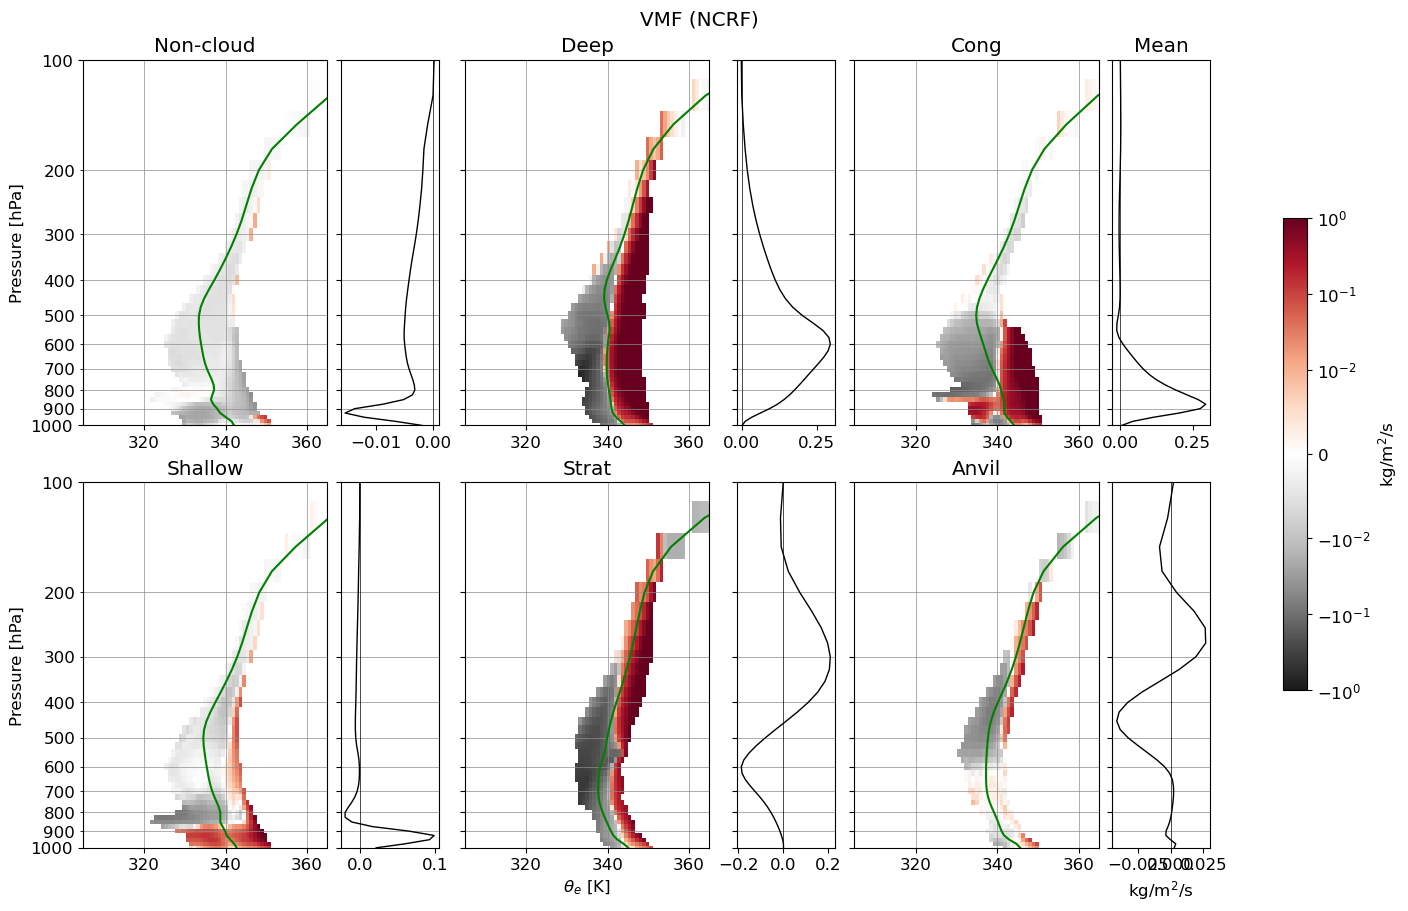

In [19]:
run_ctl_plots(
    # do_freq=True,
    # do_freqnorm=True,
    # do_relhum=True,
    do_vmf=True,
    # do_umf=True,
    # do_dmf=True,
    # do_lwcrf=True,
    # do_swcrf=True,
    # do_swrad=True,
    # do_totrad=True,
    # do_thv=True,
    ### do_thvprm=True,
    )

# if not do_tests:

#     run_ctl_plots(
#         do_freq=True,
#         do_freqnorm=True,
#         do_relhum=True,
#         do_vmf=True,
#         do_umf=True,
#         do_dmf=True,
#         do_lwcrf=True,
#         do_swcrf=True,
#         do_swrad=True,
#         do_totrad=True,
#         do_thv=True,
#         do_thvprm=True,
#         )

# elif do_tests:

#     run_testdiff_plots(
#         # do_freq=True,
#         # do_relhum=True,
#         # do_qv=True,
#         do_vmf=True,
#         # do_vmf_norm=True,
#         do_umf=True,
#         do_dmf=True,
#         # do_lw=True,
#         # do_thv=True,
#         # do_thvprm=True,
#         )

### PCLASS Frequency

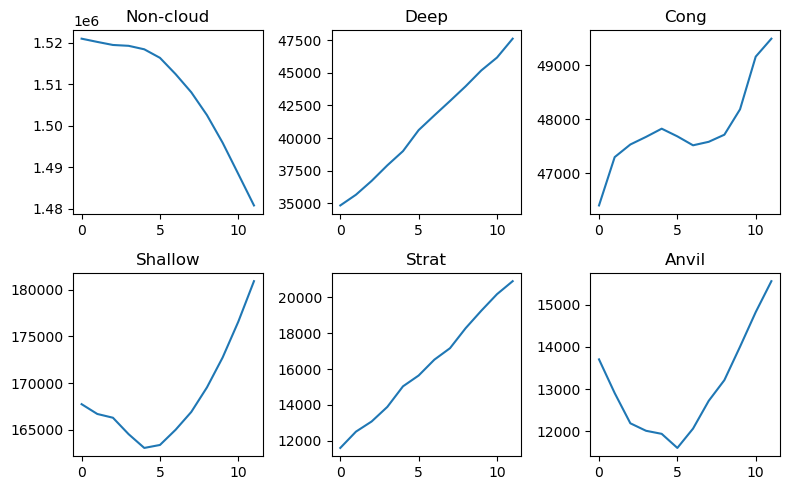

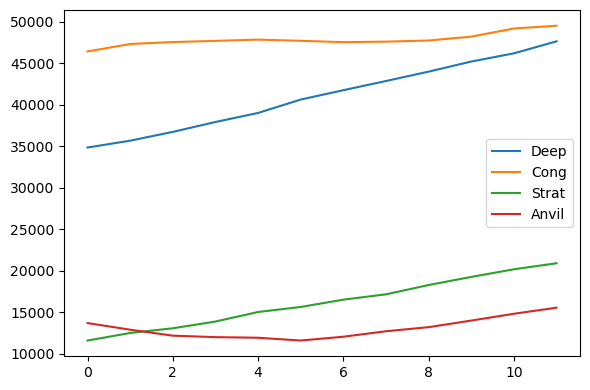

In [144]:
def plot_pclass_freq(freq):
        fig, axs = plt.subplots(2,3, figsize=(8,5))
        for ipclass in range(npclass):
                icol=ipclass
                if icol < 3:
                        irow=0
                else:
                        irow=1
                        icol-=3
                subtitle = pclass_title[ipclass]
                axs[irow,icol].set_title(subtitle)
                axs[irow,icol].plot(freq[ipclass])
        plt.tight_layout()
        plt.show()
        plt.close()
        return

def plot_pclass_freq_single(freq):
        fig, axs = plt.subplots(1,1, figsize=(6,4))
        # for ipclass in range(npclass):
        for ipclass in range(1,npclass):
                if ipclass == 3:
                        continue
                axs.plot(freq[ipclass], label=pclass_title[ipclass])
        axs.legend()
        plt.tight_layout()
        plt.show()
        plt.close()
        return

itest=0
freq_pclass = np.zeros((npclass, freq.shape[1]))
for ipclass in range(npclass):

    pclass_read = pclass_names[ipclass_plot[ipclass]]
    bins, pres, theta_e_mean, pclass_count, freq = read_isentrop_mainvars(tests[itest_plot[itest]], pclass_read)
    freq_pclass[ipclass] = np.mean(pclass_count,axis=0)

plot_pclass_freq(freq_pclass)
plot_pclass_freq_single(freq_pclass)

In [137]:
freq_pclass.shape
freq_pclass[:,0]

array([1521009. ,   34836. ,   46399.2,  167738.2,   11601.8,   13703.6])

### GMS check

In [121]:
# print(dse.shape)
# ip=0
# ix=34
# for iz in range(nz):
#     # print(z[iz]/1e3,'   ',rho[4,ip,4,iz,ix], '   ', dse[ip,iz,ix]/1e4)
#     # print(z[iz]/1e3,'   ',rho_mnn[iz], '   ', dse[ip,iz,ix]/1e4)
#     # print(z[iz]/1e3,'   ',dsdp[ip,iz,ix], '   ', dse[ip,iz,ix]/1e4)
#     # print(z[iz]/1e3,'   ',lv*dqdp[ip,iz,ix], '   ', qv_mean[ip,iz,ix]*1e3)
#     print(z[iz]/1e3,'   ',chik[ip,iz,ix], '   ', qv_mean[ip,iz,ix]*1e3)

In [122]:
# do_gms = True
do_gms = False

if do_gms:

    ktest0=0

    cp=1004 # J/K/kg
    g=9.81
    ig = 1/g

    qv = np.array(allvars['qv'][ktest0])
    qv_mean = np.mean(qv,axis=(0,2))
    tmpk = np.array(allvars['tmpk'][ktest0])
    tmpk_mean = np.mean(tmpk,axis=(0,2))
    rho = np.array(allvars['rho'][ktest0])
    # rho_mean = np.mean(tmpk,axis=(0,2))
    th_mean0 = np.array(allvars['theta_e_mn'][ktest0])
    th_mean0 = np.mean(th_mean0,axis=(0,2))

    # Get height
    # dp/dz = -rho*g  -->  z = -1/g * int(rho*dp)
    dp = (pres[1]-pres[0])*1e2
    rho_mnn = np.nanmean(rho,axis=(0,1,2,4))
    z=np.zeros(nz)
    for iz in range(1,nz):
        z[iz] = z[iz-1] - dp/(g*rho_mnn[iz])

    dse = cp*tmpk_mean + g*z[np.newaxis,:,np.newaxis]

    # Calculate Chikira parameter
    dsdp = np.gradient(dse, dp, axis=1)
    dqdp = np.gradient(qv_mean, dp, axis=1)
    lv = 2.5e6 # J/kg
    chik0 = -lv*(dqdp/dsdp)
    # chik_mn = np.nanmean(chik)
    # chik -= chik_mn

    title_tag = "DSE' ("+tests_str[ktest0].upper()+')  '
    units = 'J/kg'
    cmap = 'RdGy_r'
    # normmin=-1e0; normmax=1e0
    # norm = colors.SymLogNorm(linthresh=1e-2, linscale=1, vmin=normmin, vmax=normmax)
    # plot_pclass_multipan(bins, pres, dse/1e4, th_mean, title_tag, units, pclass_title,
    #                     cmap=cmap, norm=None)#, invar_mean=invar_allmean)

    title_tag = r"$\alpha$ ("+tests_str[ktest0].upper()+')  '
    units = 'unitless'
    cmap = 'RdGy_r'
    normmin=0; normmax=2
    norm = colors.Normalize(vmin=normmin, vmax=normmax)
    # norm = colors.CenteredNorm(halfrange=0.25)
    plot_pclass_multipan(bins, pres, chik0, th_mean0, title_tag, units, pclass_title,
                        cmap=cmap, norm=norm)#, invar_mean=invar_allmean)


In [123]:
if do_gms:

    # for ktest in range(1,ntest):
    for ktest in range(1,2):

        qv = np.array(allvars['qv'][ktest])
        tmpk = np.array(allvars['tmpk'][ktest])
        qv_mean = np.mean(qv,axis=(0,2))
        tmpk_mean = np.mean(tmpk,axis=(0,2))
        th_mean1 = np.array(allvars['theta_e_mn'][ktest])
        th_mean1 = np.mean(th_mean1,axis=(0,2))

        dse = cp*tmpk_mean + g*z[np.newaxis,:,np.newaxis]
        dsdp = np.gradient(dse, dp, axis=1)
        dqdp = np.gradient(qv_mean, dp, axis=1)
        chik1 = -lv*(dqdp/dsdp)
        # chik_mn = np.nanmean(chik)
        # chik1 -= chik_mn

        title_tag = r"$\alpha$ Difference: "+tests_str[ktest].upper()+'-'+tests_str[ktest0].upper()
        units = '-'
        cmap = 'RdGy_r'
        # norm=None
        norm = colors.CenteredNorm(halfrange=0.01)

        var_diff = chik1 - chik0
        # invar_allmean = thv_allmean1 - thv_allmean0

        plot_pclass_multipan(bins, pres, var_diff, th_mean1, title_tag, units, pclass_title,
                            cmap=cmap, norm=norm, th_mean0=th_mean0)#, do_thm0_pclass=True, invar_mean=invar_allmean)
